## Supervised Machine Learning: Regression

### Contents:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### Import Libraries & Dataset

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [87]:
# Creating path to import dataset

path = r'C:\Users\aleen\OneDrive\Desktop\Aleena\CF assignments\Data Immersion\Achievement 6\Climate Change\ClimateChange'

In [120]:
# Importing dataset climate_clean as df_climate

df =  pd.read_csv(os.path.join(path, 'climate_change.csv'), index_col = False)

### Data Cleaning

In [105]:
df.columns

Index(['Unnamed: 0', 'country_name', 'months', 'year', 'temp_change'], dtype='object')

In [106]:
df.head(20)

,Unnamed: 0,country_name,months,year,temp_change
0,0,Afghanistan,January,1961,0.777
1,1,Afghanistan,February,1961,-1.743
2,2,Afghanistan,March,1961,0.516
3,3,Afghanistan,April,1961,-1.709
4,4,Afghanistan,May,1961,1.412
5,5,Afghanistan,June,1961,-0.058
6,6,Afghanistan,July,1961,0.884
7,7,Afghanistan,August,1961,0.391
8,8,Afghanistan,September,1961,1.445
9,9,Afghanistan,October,1961,-1.102


In [107]:
df.shape

(284852, 5)

#### Check for Missing values

In [108]:
# Check for missing values

df.isnull().sum()

Unnamed: 0      0
country_name    0
months          0
year            0
temp_change     0
dtype: int64

No missing data found

#### Check for Duplicates

In [109]:
# Check for duplicates

dups = df.duplicated()

In [110]:
dups.shape

(284852,)

No duplicates found

#### Extreme Values Check

C:\Users\aleen\AppData\Local\Temp\ipykernel_33772\322020864.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp_change'], bins=25)


<Axes: xlabel='temp_change', ylabel='Density'>

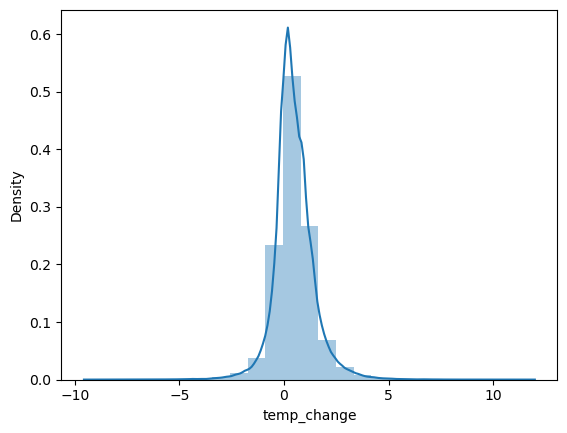

In [95]:
# Shows extreme values

sns.distplot(df['temp_change'], bins=25)

In [96]:
# Check the mean

df['temp_change'].mean()

0.4707916651270913

In [97]:
# Check the median

df['temp_change'].median()

0.382

In [98]:
# Check the max

df['temp_change'].max()

11.759

### Data Prep for Regression Analysis

In [136]:
df_1 = df[df["months"].isin(['Spring', 'Fall', 'Winter', 'Summer'])]

In [137]:
df_1.head(20)

,Unnamed: 0,country_name,months,year,temp_change
12,12,Afghanistan,Winter,1961,-0.731
13,13,Afghanistan,Spring,1961,0.073
14,14,Afghanistan,Summer,1961,0.406
15,15,Afghanistan,Fall,1961,-0.066
29,29,Albania,Winter,1961,0.638
30,30,Albania,Spring,1961,0.964
31,31,Albania,Summer,1961,-0.108
32,32,Albania,Fall,1961,1.030
46,46,Algeria,Winter,1961,-0.631
47,47,Algeria,Spring,1961,0.844


In [138]:
df_2 = df_1.groupby(['country_name'])

In [143]:
df_2.head(20)

,Unnamed: 0,country_name,months,year,temp_change
12,12,Afghanistan,Winter,1961,-0.731
13,13,Afghanistan,Spring,1961,0.073
14,14,Afghanistan,Summer,1961,0.406
15,15,Afghanistan,Fall,1961,-0.066
29,29,Albania,Winter,1961,0.638
...,...,...,...,...,...
24121,24121,Non-Annex I countries,Fall,1965,0.062
24135,24135,OECD,Winter,1965,-0.732
24136,24136,OECD,Spring,1965,-0.110
24137,24137,OECD,Summer,1965,-0.495


In [145]:
df_3 = df_1.groupby(['months'])

In [146]:
df_3.head(20)

,Unnamed: 0,country_name,months,year,temp_change
12,12,Afghanistan,Winter,1961,-0.731000
13,13,Afghanistan,Spring,1961,0.073000
14,14,Afghanistan,Summer,1961,0.406000
15,15,Afghanistan,Fall,1961,-0.066000
29,29,Albania,Winter,1961,0.638000
...,...,...,...,...,...
321,321,Barbados,Fall,1961,0.000000
335,335,Belarus,Winter,1961,0.144488
336,336,Belarus,Spring,1961,0.144488
337,337,Belarus,Summer,1961,0.144488


#### Creating Scatter Plot

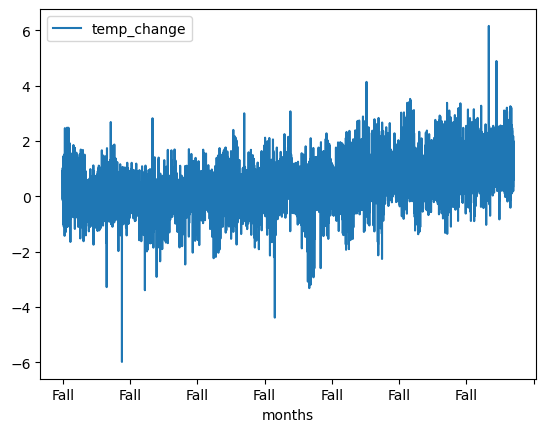

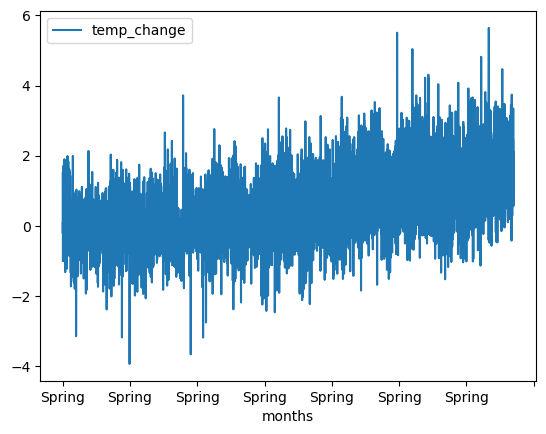

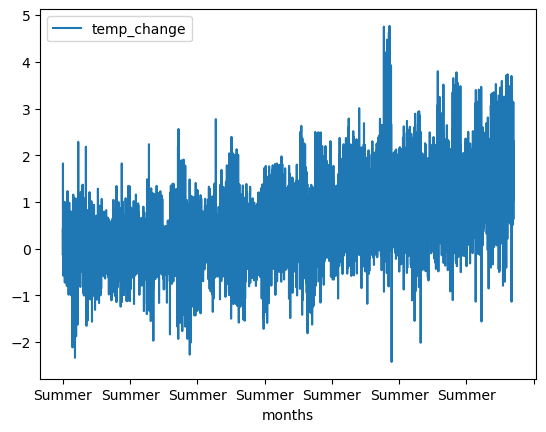

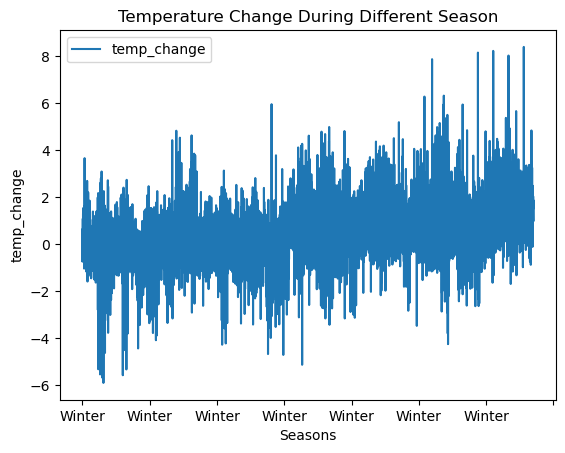

In [147]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_3.plot(x = 'months', y='temp_change') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Temperature Change During Different Season')  
plt.xlabel('Seasons')  
plt.ylabel('temp_change')  
plt.show()

In [164]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['year'].values.reshape(-1,1)
y = df['temp_change'].values.reshape(-1,1)

In [165]:
X

array([[1961],
       [1961],
       [1961],
       ...,
       [2019],
       [2019],
       [2019]], dtype=int64)

In [166]:
y

array([[ 0.777],
       [-1.743],
       [ 0.516],
       ...,
       [ 1.078],
       [ 1.233],
       [ 1.297]])

In [167]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [168]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [169]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [170]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

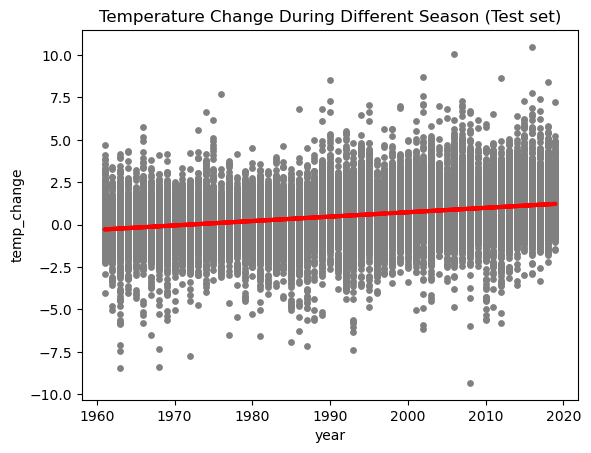

In [172]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Temperature Change During Different Season (Test set)')
plot_test.xlabel('year')
plot_test.ylabel('temp_change')
plot_test.show()

In [173]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [174]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02595078]]
Mean squared error:  0.7328758820505855
R2 score:  0.21204444836222724


In [175]:
y_predicted

array([[ 0.7043816 ],
       [ 0.75628316],
       [ 0.44487379],
       ...,
       [ 0.41892301],
       [-0.12604338],
       [ 0.65248004]])

In [176]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.306000,0.704382
1,0.505000,0.756283
2,-0.923000,0.444874
3,0.581593,0.470825
4,1.728000,0.782234
5,0.515000,1.067693
6,1.443926,1.145545
7,1.364000,1.119594
8,2.982000,-0.281748
9,0.599000,0.003711


### Compare how the regression fits the training set

In [177]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [178]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [179]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02595078]]
Mean squared error:  0.7232815481881587
R2 score:  0.21250867774024518


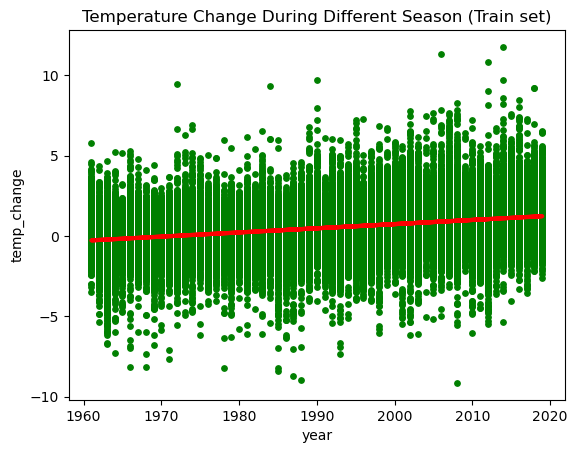

In [181]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Temperature Change During Different Season (Train set)')
plot_test.xlabel('year')
plot_test.ylabel('temp_change')
plot_test.show()